In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
from os import path

data_dir = 'data/bank-transactions'
data_file = 'bank-transactions-treated.csv'
data_path = path.join(data_dir, data_file)

data_scaled = pd.read_csv(data_path)
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251810 entries, 0 to 251809
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CustGender               251810 non-null  float64
 1   CustAccountBalance       251810 non-null  float64
 2   TransactionAmount (INR)  251810 non-null  float64
 3   CustomerAge              251810 non-null  int64  
 4   TransactionTimestamp     251810 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 9.6 MB


## Critérios de avaliação dos agrupadores
Nesta secção vamos fazer a validação dos agrupadores utilizando critérios de avaliação internas e relativas, pois os critérios externos não podem ser utilizados dado que não temos um atributo de classificação

### Método do cotovelo (ou joelho)

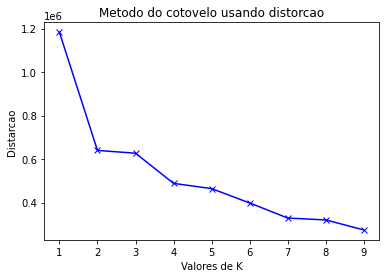

In [3]:
from scipy.spatial.distance import cdist
# metodo do cotovelo
intervalo = range(1, 10)
inercias = []
distorcao = []

for i in intervalo:
    kmeansModel = KMeans(n_clusters = i).fit(data_scaled)
    kmeansModel.fit(data_scaled)
    
    distorcao.append(sum(np.min(cdist(data_scaled, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / data_scaled.shape[0])
    inercias.append(kmeansModel.inertia_)


plt.plot(intervalo, distorcao, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distarcao')
plt.title('Metodo do cotovelo usando distorcao')
plt.show()

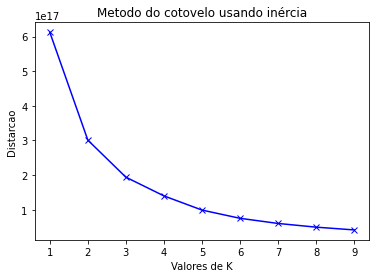

In [4]:
plt.plot(intervalo, inercias, 'bx-')
plt.xlabel('Valores de K')
plt.ylabel('Distarcao')
plt.title('Metodo do cotovelo usando inércia')
plt.show()

Observando os resultados do método do cotovelo, tanto utilizando a distorção quanto a inércia, vemos que o melhor valor de K para este conjunto seria 2.

## Silhouette score

Aqui faremos a validação do Kmeans utilizando a metrica de siluetas para validar com diferentes valores de K.

Usamos também, para melhor visualização dos resultados (com um plot) o pacote yellowcricks.cluster. Ideia de visualização veio pelo site https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam 

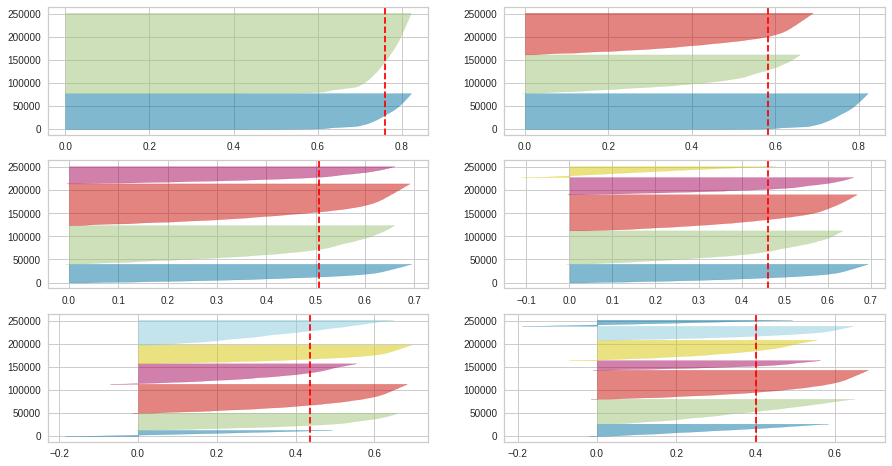

In [5]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

### Observação
Cuidado ao rodar a célula à seguir, no meu computador onde tem um processador I7 de 3 geração com 16 GB de RAM, demorou algumas horas

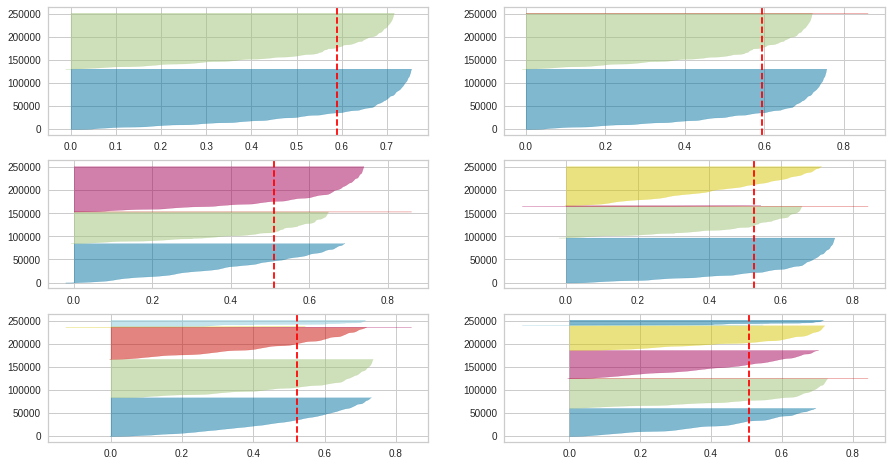

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(15, 8))
for i in range(2, 8):
    # criação das instancias do kmeans para diferentes numeros de clustes
    km = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    # criando a visualização da Silhouette usando as instancias do kmeans
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_scaled)

Observando o resultado do Silhouette score, vemos que para valores de K acima de 3, começa a aparecer ruidos em alguns clusters, porém, se baixar essa imagem e olhar com um zoom sobre o K em 3, o cluster de cor verde contém um ruido bem suave.

De acordo com as interpretações descritas nas células acima, vemos que o valor de K entre 2 e 4 ainda se mantém com bons resultados, assim, considerando uma média deles, consideraremos os valores 2 e 3 como valores para análise.